## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [31]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [32]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [33]:
df.shape

(19622, 160)

In [34]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [35]:
       # <Your code goes in here>
       df.isnull().sum()

Unnamed: 0              0
user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
                       ..
accel_forearm_z         0
magnet_forearm_x        0
magnet_forearm_y        0
magnet_forearm_z        0
classe                  0
Length: 160, dtype: int64

2). Get rid of the columns that have more than 97% missing values.

In [36]:
       # <Your code goes in here>
       df.dropna(axis=1,how="any",thresh=0.97)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,...,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-21,...,-65.0,28.4,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,-22,...,-64.0,28.3,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-20,...,-63.0,28.3,-63.9,-152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.03,-22,...,-60.0,28.1,-63.9,-152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.02,-0.02,-21,...,-68.0,28.0,-63.9,-152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,19618,adelmo,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,-0.02,-0.67,50,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,19619,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [37]:
from numpy import unique
# <Your code goes in here>
# summarize the number of unique values in each column
counts= df.nunique()
print(counts)
#record columns to delete 
to_del=[i for i, v in enumerate(counts) if v ==1 ]
# drop useless colums
#df.drop(to_del,axis=1,inplace=True)
df.shape
#drop columns that contain time in the name 
df.drop(df.columns[df.columns.str.contains('time')], axis=1)
df.shape

Unnamed: 0              19622
user_name                   6
raw_timestamp_part_1      837
raw_timestamp_part_2    16783
cvtd_timestamp             20
                        ...  
accel_forearm_z           580
magnet_forearm_x         1524
magnet_forearm_y         1872
magnet_forearm_z         1683
classe                      5
Length: 160, dtype: int64


(19622, 160)

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [38]:
# <Your code goes in here>
from sklearn import preprocessing
# creating instance of labelencoder
le = preprocessing.LabelEncoder()
le.get_params(deep=True)
# Encoding the variable
#check which columns in dataframe are categorical
categorical_list=df.select_dtypes(include=['object']).columns.tolist()
print(categorical_list)
le.fit(categorical_list)
x=le.fit_transform(categorical_list)
le.transform(categorical_list)

['user_name', 'cvtd_timestamp', 'new_window', 'kurtosis_roll_belt', 'kurtosis_picth_belt', 'kurtosis_yaw_belt', 'skewness_roll_belt', 'skewness_roll_belt.1', 'skewness_yaw_belt', 'max_yaw_belt', 'min_yaw_belt', 'amplitude_yaw_belt', 'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm', 'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm', 'kurtosis_roll_dumbbell', 'kurtosis_picth_dumbbell', 'kurtosis_yaw_dumbbell', 'skewness_roll_dumbbell', 'skewness_pitch_dumbbell', 'skewness_yaw_dumbbell', 'max_yaw_dumbbell', 'min_yaw_dumbbell', 'amplitude_yaw_dumbbell', 'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm', 'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm', 'max_yaw_forearm', 'min_yaw_forearm', 'amplitude_yaw_forearm', 'classe']


array([36,  4, 23, 10,  6, 14, 28, 29, 33, 17, 20,  0,  9,  5, 13, 27, 24,
       32, 11,  7, 15, 30, 25, 34, 18, 21,  1, 12,  8, 16, 31, 26, 35, 19,
       22,  2,  3])

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# <Your code goes in here>
la=preprocessing.MinMaxScaler()
# creating instance of MinMaxScaler
la = preprocessing.MinMaxScaler()
# separate into input and output columns
df_set=df.values
# the names of numeric columns
y_df=df.select_dtypes(include=np.number).columns.tolist()
print(y_df)
y=df.select_dtypes('number')
print(y)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(y)
print(scaled)

['Unnamed: 0', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'num_window', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt', 'max_roll_belt', 'max_picth_belt', 'min_roll_belt', 'min_pitch_belt', 'amplitude_roll_belt', 'amplitude_pitch_belt', 'var_total_accel_belt', 'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt', 'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt', 'stddev_yaw_belt', 'var_yaw_belt', 'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'var_accel_arm', 'avg_roll_arm', 'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm', 'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'mi

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

Accuracy: nan (nan)


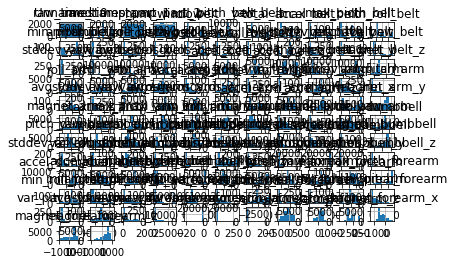

In [47]:
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
#Grid search
n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
RandomForestClassifier(n_estimators=10, max_depth=3)
RandomForestClassifier(n_estimators=10, max_depth=10)
RandomForestClassifier(n_estimators=10, max_depth=20)
RandomForestClassifier(n_estimators=10, max_depth=40)

RandomForestClassifier(n_estimators=50, max_depth=3)
RandomForestClassifier(n_estimators=50, max_depth=10)
RandomForestClassifier(n_estimators=50, max_depth=20)
RandomForestClassifier(n_estimators=50, max_depth=40)

RandomForestClassifier(n_estimators=100, max_depth=3)
RandomForestClassifier(n_estimators=100, max_depth=10)
RandomForestClassifier(n_estimators=100, max_depth=20)
RandomForestClassifier(n_estimators=100, max_depth=40)

RandomForestClassifier(n_estimators=200, max_depth=3)
RandomForestClassifier(n_estimators=200, max_depth=10)
RandomForestClassifier(n_estimators=200, max_depth=20)
RandomForestClassifier(n_estimators=200, max_depth=40)
df.hist()
array = df.values
X = array[:,0:8]
Y = array[:,8]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
#pyplot.show()